In [28]:
import numpy as np


def rayleigh_channel_filtered_gaussian(fmT, Omgp=1, sample_num=300):
    """
    Generate the in-phase and quadrature components of a Rayleigh fading channel with filtered Gaussian noise.

    Parameters:
    - fmT: The normalized Doppler frequency, fmT = f_m * T, where f_m is the maximum Doppler frequency and T is the symbol period.
    - Omgp: The power spectral density of the Gaussian noise source.
    - sample_num: The number of samples to generate.

    Returns:
    - gI: The in-phase component of the Rayleigh fading channel.
    - gQ: The quadrature component of the Rayleigh fading channel.
    """

    # Calculate sigma for the first-order low-pass filter
    sigma = (
        2 - np.cos(np.pi * fmT / 2) - np.sqrt((2 - np.cos(np.pi * fmT / 2)) ** 2 - 1)
    )

    # Calculate the variance of Gaussian noise source
    var = (1 + sigma) / (1 - sigma) * Omgp / 2

    # Generate two independent white Gaussian noise sources for Gi and Gq
    w1 = np.random.normal(0, np.sqrt(var), sample_num)
    w2 = np.random.normal(0, np.sqrt(var), sample_num)

    # Initialize the in-phase (Gi) and quadrature (Gq) output arrays
    gI = np.zeros(sample_num)
    gQ = np.zeros(sample_num)
    gI[0] = 1  # Initial condition
    gQ[0] = 1  # Initial condition

    # Apply the first-order lowpass filter to generate Gi and Gq
    for j in range(1, sample_num):
        gI[j] = sigma * gI[j - 1] + (1 - sigma) * w1[j - 1]
        gQ[j] = sigma * gQ[j - 1] + (1 - sigma) * w2[j - 1]

    # Return the in-phase and quadrature components
    return gI, gQ


def rayleigh_channel_sum_of_sinusoids(fmT, M, T=1, sample_num=3000):
    """
    Generate the in-phase and quadrature components of a Rayleigh fading channel using the sum of sinusoids method.

    Parameters:
    - fmT: The normalized Doppler frequency, fmT = f_m * T, where f_m is the maximum Doppler frequency and T is the symbol period.
    - M: The number of sinusoids to use in the sum.
    - T: The symbol period.
    - sample_num: The number of samples to generate.

    Returns:
    - gI: The in-phase component of the Rayleigh fading channel.
    - gQ: The quadrature component of the Rayleigh fading channel.
    """

    fm = fmT / T
    m = np.arange(1, M + 1)
    N = 4 * M + 2
    n = np.arange(1, N + 1)
    theta_n = 2 * np.pi * n / N  # theta_n is uniformly distributed
    theta_m = theta_n[:M]
    beta_m = np.pi * m / M
    alpha = 0

    # Calculate the Doppler shifts for different angles
    fn = np.outer(fm, np.cos(theta_m))

    gI = np.zeros(sample_num + 1)
    gQ = np.zeros(sample_num + 1)

    # Calculate gI and gQ using sum of sinusoids
    for t in range(sample_num + 1):
        gI[t] = 2 * np.sum(
            np.cos(beta_m) * np.cos(2 * np.pi * t * fn), axis=1
        ) + np.sqrt(2) * np.cos(alpha) * np.cos(2 * np.pi * fm * t)
        gQ[t] = 2 * np.sum(
            np.sin(beta_m) * np.cos(2 * np.pi * t * fn), axis=1
        ) + np.sqrt(2) * np.sin(alpha) * np.cos(2 * np.pi * fm * t)

    return gI, gQ

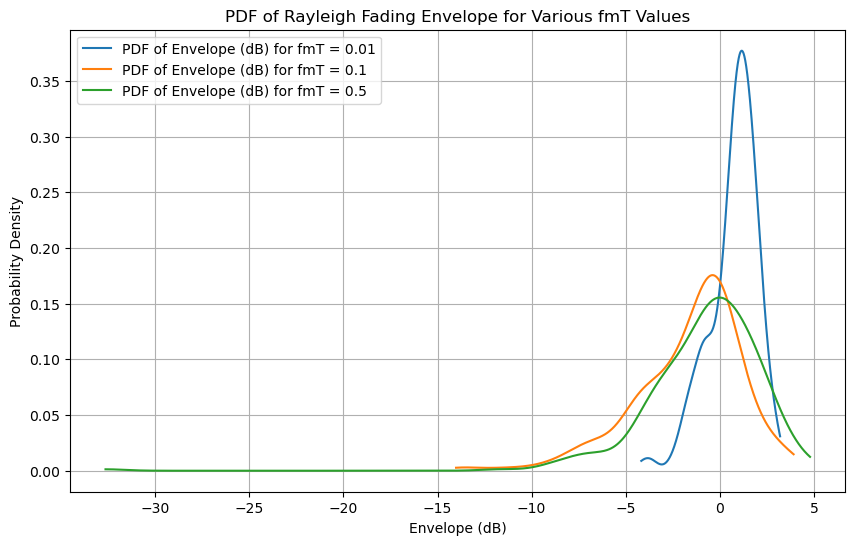

In [29]:
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Example usage for different fmT values
fmTs = [0.01, 0.1, 0.5]
plt.figure(figsize=(10, 6))  # Specify the size of the figure
for fmT in fmTs:
    gI, gQ = rayleigh_channel_filtered_gaussian(fmT)
    envelope = np.sqrt(gI**2 + gQ**2)
    envelope_dB = 10 * np.log10(envelope)
    density = gaussian_kde(envelope_dB)
    x = np.linspace(min(envelope_dB), max(envelope_dB), 1000)
    pdf = density(x)
    plt.plot(x, pdf, label=f"PDF of Envelope (dB) for fmT = {fmT}")

plt.title("PDF of Rayleigh Fading Envelope for Various fmT Values")
plt.xlabel("Envelope (dB)")
plt.ylabel("Probability Density")
plt.legend()
plt.grid(True)
plt.show()

/var/folders/x4/5z4_pt2n7m12cdcvjm0d6cjw0000gn/T/ipykernel_4656/3426996443.py:77: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  gI[t] = 2 * np.sum(
/var/folders/x4/5z4_pt2n7m12cdcvjm0d6cjw0000gn/T/ipykernel_4656/3426996443.py:80: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  gQ[t] = 2 * np.sum(


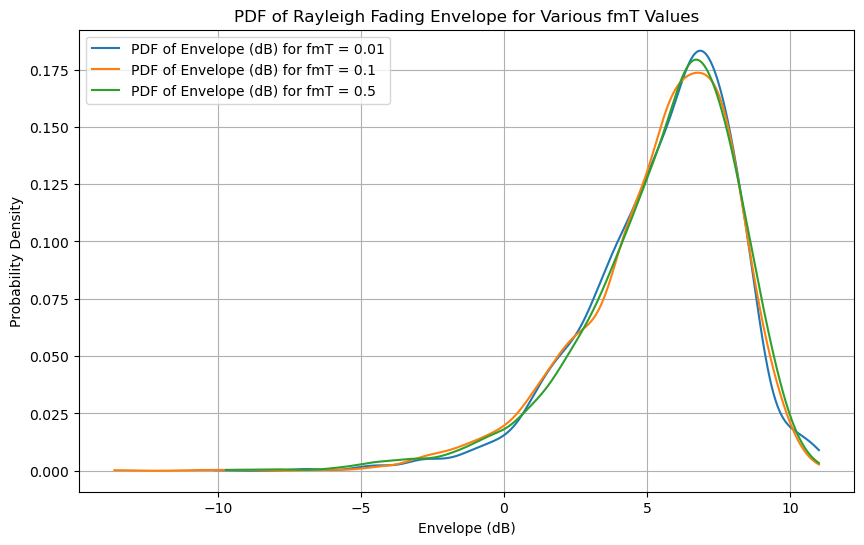

In [30]:
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Example usage for different fmT values
fmTs = [0.01, 0.1, 0.5]
plt.figure(figsize=(10, 6))  # Specify the size of the figure
for fmT in fmTs:
    gI, gQ = rayleigh_channel_sum_of_sinusoids(fmT, 10)
    envelope = np.sqrt(gI**2 + gQ**2)
    envelope_dB = 10 * np.log10(envelope)
    density = gaussian_kde(envelope_dB)
    x = np.linspace(min(envelope_dB), max(envelope_dB), 1000)
    pdf = density(x)
    plt.plot(x, pdf, label=f"PDF of Envelope (dB) for fmT = {fmT}")

plt.title("PDF of Rayleigh Fading Envelope for Various fmT Values")
plt.xlabel("Envelope (dB)")
plt.ylabel("Probability Density")
plt.legend()
plt.grid(True)
plt.show()

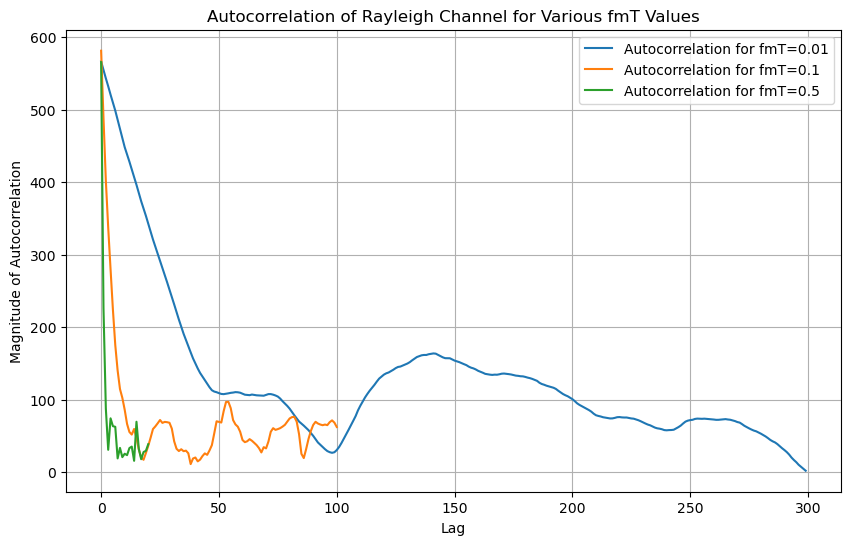

In [32]:
# Example usage for different fmT values
fmTs = [0.01, 0.1, 0.5]
T = 1  # symbol period

plt.figure(figsize=(10, 6))  # Create a single figure for all plots
for fmT in fmTs:
    fm = fmT / T
    tau = int(10 / fm)  # Largest tau, satisfying fm*tau=0~10

    gI, gQ = rayleigh_channel_filtered_gaussian(fmT)
    g = np.sqrt(2) * (gI + 1j * gQ)  # Form the complex channel signal

    # Compute full autocorrelation and extract half (as autocorrelation is symmetrical)
    full_ac = np.correlate(g, g, mode="full")
    half_ac = full_ac[len(full_ac) // 2 : len(full_ac) // 2 + tau + 1]

    # Add plot for current fmT
    plt.plot(np.abs(half_ac), label=f"Autocorrelation for fmT={fmT}")

plt.title("Autocorrelation of Rayleigh Channel for Various fmT Values")
plt.xlabel("Lag")
plt.ylabel("Magnitude of Autocorrelation")
plt.legend()
plt.grid(True)
plt.show()

/var/folders/x4/5z4_pt2n7m12cdcvjm0d6cjw0000gn/T/ipykernel_4656/3426996443.py:77: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  gI[t] = 2 * np.sum(
/var/folders/x4/5z4_pt2n7m12cdcvjm0d6cjw0000gn/T/ipykernel_4656/3426996443.py:80: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  gQ[t] = 2 * np.sum(


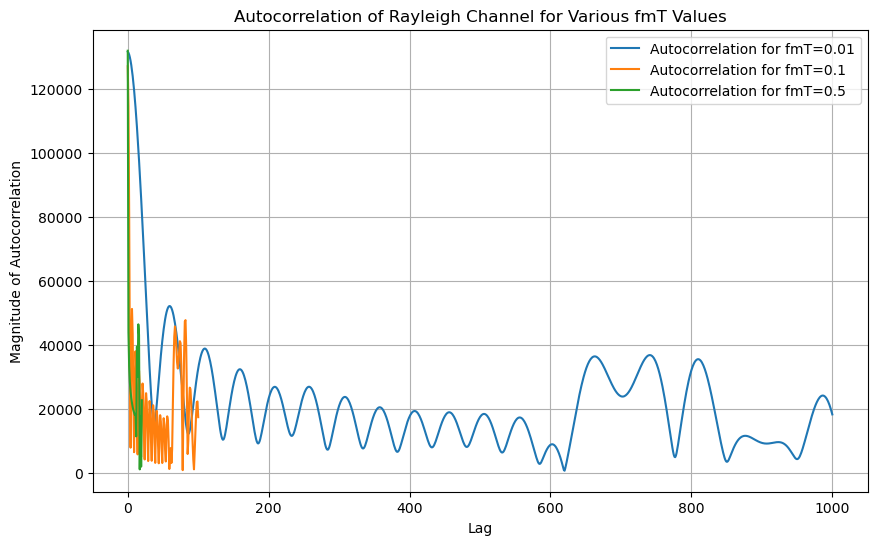

In [33]:
# Example usage for different fmT values
fmTs = [0.01, 0.1, 0.5]
T = 1  # symbol period

plt.figure(figsize=(10, 6))  # Create a single figure for all plots
for fmT in fmTs:
    fm = fmT / T
    tau = int(10 / fm)  # Largest tau, satisfying fm*tau=0~10

    gI, gQ = rayleigh_channel_sum_of_sinusoids(fmT, 10)
    g = np.sqrt(2) * (gI + 1j * gQ)  # Form the complex channel signal

    # Compute full autocorrelation and extract half (as autocorrelation is symmetrical)
    full_ac = np.correlate(g, g, mode="full")
    half_ac = full_ac[len(full_ac) // 2 : len(full_ac) // 2 + tau + 1]

    # Add plot for current fmT
    plt.plot(np.abs(half_ac), label=f"Autocorrelation for fmT={fmT}")

plt.title("Autocorrelation of Rayleigh Channel for Various fmT Values")
plt.xlabel("Lag")
plt.ylabel("Magnitude of Autocorrelation")
plt.legend()
plt.grid(True)
plt.show()